# **Carga de data y librerias**



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import seaborn as sns
import seaborn.objects as so

# **Limpieza del DataSet**

In [ ]:
link='./gdrive/MyDrive/ProyectoESPOL/Datasets/DataFootball_1.csv'
df=pd.read_csv(link,  sep=';' )
df

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18,186.0,Niger,Forward,1000000,12,287,0,0,...,16,34,6,15,13,36,48,33,No,No
6820,Renato Steffen,25,170.0,Switzerland,Forward,3500000,16,659,0,0,...,16,34,6,15,13,36,48,33,No,No
6821,Paul Jaeckel,19,189.0,Germany,Defender,5000,3,270,0,0,...,16,34,6,15,13,36,48,33,No,No
6822,Paul Verhaegh,33,178.0,Netherlands,Defender,1000000,31,2614,2,2,...,16,34,6,15,13,36,48,33,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6824 entries, 0 to 6823
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player                   6824 non-null   object 
 1   age                      6824 non-null   int64  
 2   height                   6823 non-null   float64
 3   nationality              6824 non-null   object 
 4   position                 6824 non-null   object 
 5   value                    6824 non-null   int64  
 6   games                    6824 non-null   int64  
 7   minutes                  6824 non-null   int64  
 8   goals                    6824 non-null   int64  
 9   assists                  6824 non-null   int64  
 10  crosses                  6824 non-null   int64  
 11  tackles                  6824 non-null   int64  
 12  pressures                6824 non-null   int64  
 13  blocks                   6824 non-null   int64  
 14  touches                 

In [ ]:
df['age'].replace(0,np.nan,inplace=True)
df['height'].replace(0,np.nan,inplace=True)

In [ ]:
def missing_data_columns(dataFrame):
  dataNan=dataFrame.isnull().sum(axis=0)
  return dataNan

In [ ]:
missing_data_columns(df)

player                       0
age                          3
height                      11
nationality                  0
position                     0
value                        0
games                        0
minutes                      0
goals                        0
assists                      0
crosses                      0
tackles                      0
pressures                    0
blocks                       0
touches                      0
fouls                        0
fouled                       0
offsides                     0
own goals                    0
ball recoveries              0
saves                        0
squad                        0
Season                       0
league                       0
Attendance                   0
games starts                 0
passes completed             0
sca                          0
gca                          0
dribbles completed           0
pens won                     0
goals against gk             0
shots on

In [ ]:
def calc_mode (feature,dataFrame):
  mode=dataFrame[feature].mode()
  return mode

In [ ]:
def calc_media(feature,dataFrame):
  media=dataFrame[feature].mean()
  return media

In [ ]:
def percent_lost_data(dataFrame,feature):
  cant_nan=missing_data_columns(dataFrame)
  per=(cant_nan.loc[feature]/dataFrame.shape[0])*100
  return round(per,2)

In [ ]:
mediaEdad=round(calc_media('age',df),0)
df['age'].replace(np.nan,mediaEdad,inplace=True)

In [ ]:
mediaHeight=round(calc_media('height',df),0)
df['height'].replace(np.nan,mediaHeight,inplace=True)

In [ ]:
modaCLBestScorer=calc_mode('CLBestScorer',df)
print(modaCLBestScorer)
df['CLBestScorer'].replace(np.nan,'No',inplace=True)

0    No
Name: CLBestScorer, dtype: object


In [ ]:
df

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30.0,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37.0,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26.0,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19.0,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22.0,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18.0,186.0,Niger,Forward,1000000,12,287,0,0,...,16,34,6,15,13,36,48,33,No,No
6820,Renato Steffen,25.0,170.0,Switzerland,Forward,3500000,16,659,0,0,...,16,34,6,15,13,36,48,33,No,No
6821,Paul Jaeckel,19.0,189.0,Germany,Defender,5000,3,270,0,0,...,16,34,6,15,13,36,48,33,No,No
6822,Paul Verhaegh,33.0,178.0,Netherlands,Defender,1000000,31,2614,2,2,...,16,34,6,15,13,36,48,33,No,No


In [ ]:
df[df['player']=='Cristiano Ronaldo']

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
2089,Cristiano Ronaldo,34.0,187.0,Portugal,Forward,60000000,33,2917,31,5,...,1,38,26,5,7,76,43,83,Yes,No
3537,Cristiano Ronaldo,33.0,187.0,Portugal,Forward,90000000,31,2688,21,8,...,1,38,28,6,4,70,30,90,Yes,No
6231,Cristiano Ronaldo,32.0,187.0,Portugal,Forward,100000000,27,2288,26,5,...,3,38,22,10,6,94,44,76,Yes,Yes


In [ ]:
df.describe()

,age,height,value,games,minutes,goals,assists,crosses,tackles,pressures,...,cards yellow,shots total,LgRk,MP,W,D,L,GF,GA,Pts
count,6824.000000,6824.000000,6.824000e+03,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,...,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,25.440504,182.230217,1.023350e+07,19.031653,1342.866208,1.828693,1.261284,16.994285,22.942556,213.284437,...,2.787222,17.054367,10.337046,36.583529,13.725381,9.071073,13.787075,50.425557,50.479045,50.236665
std,4.412284,6.496048,1.660910e+07,11.175267,972.311088,3.458147,2.021036,24.585900,22.318046,189.785532,...,2.820151,21.584069,5.721757,2.868877,6.015922,3.091087,5.721998,17.686226,13.249049,17.365470
min,14.000000,162.000000,5.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,27.000000,2.000000,2.000000,1.000000,22.000000,21.000000,13.000000
25%,22.000000,178.000000,1.500000e+06,9.000000,455.000000,0.000000,0.000000,1.000000,4.000000,49.000000,...,0.000000,2.000000,5.000000,38.000000,9.000000,7.000000,10.000000,37.000000,42.000000,39.000000
50%,25.000000,183.000000,4.000000e+06,20.000000,1236.000000,0.000000,0.000000,6.000000,17.000000,175.000000,...,2.000000,10.000000,10.000000,38.000000,13.000000,9.000000,14.000000,47.000000,50.000000,48.000000
75%,28.000000,187.000000,1.200000e+07,29.000000,2121.000000,2.000000,2.000000,23.000000,36.000000,326.000000,...,4.000000,23.000000,15.000000,38.000000,17.000000,11.000000,17.000000,59.000000,59.000000,60.000000
max,41.000000,203.000000,2.000000e+08,38.000000,3420.000000,36.000000,21.000000,223.000000,160.000000,1056.000000,...,17.000000,196.000000,20.000000,38.000000,32.000000,18.000000,29.000000,108.000000,85.000000,100.000000


In [ ]:
missing_data_columns(df)

player                     0
age                        0
height                     0
nationality                0
position                   0
value                      0
games                      0
minutes                    0
goals                      0
assists                    0
crosses                    0
tackles                    0
pressures                  0
blocks                     0
touches                    0
fouls                      0
fouled                     0
offsides                   0
own goals                  0
ball recoveries            0
saves                      0
squad                      0
Season                     0
league                     0
Attendance                 0
games starts               0
passes completed           0
sca                        0
gca                        0
dribbles completed         0
pens won                   0
goals against gk           0
shots on target against    0
CLBestScorer               0
cards yellow  

# **Visualizacion de los investigado**

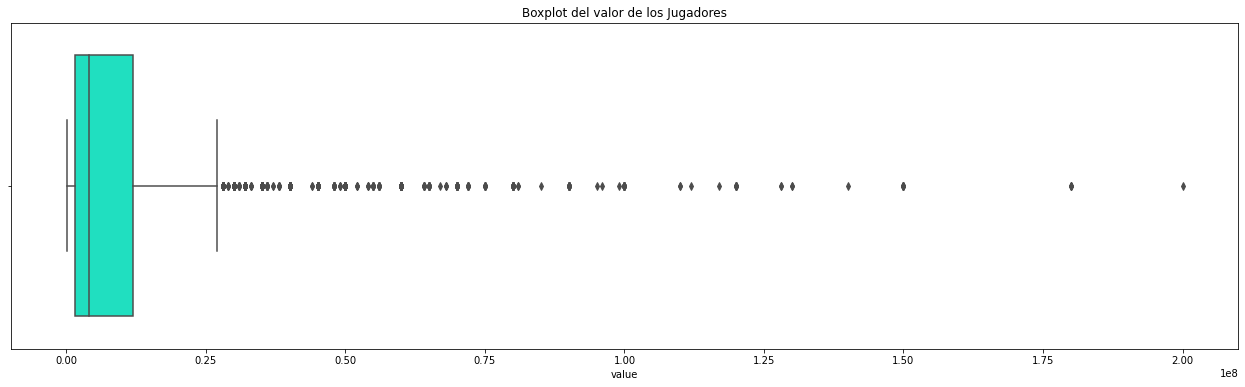

In [ ]:
#Podemos ver como el precio de jugadores algunos tiende a tender precios demasiados altos
plt.subplots(figsize = (22, 6))

sns.boxplot(x=df['value'],color='#00FFD5')
plt.title('Boxplot del valor de los Jugadores')
plt.show()

In [ ]:
#Quise analizar porque estos jugadores tienen valores tan elevados
#Calculo de los valores atipicos
Q1=df['value'].quantile(0.25)
Q2=df['value'].median()
Q3=df['value'].quantile(0.75)

valMin=df['value'].min()
valMax=df['value'].max()

RangoIQ=Q3-Q1

limiSu=Q3+1.5*RangoIQ

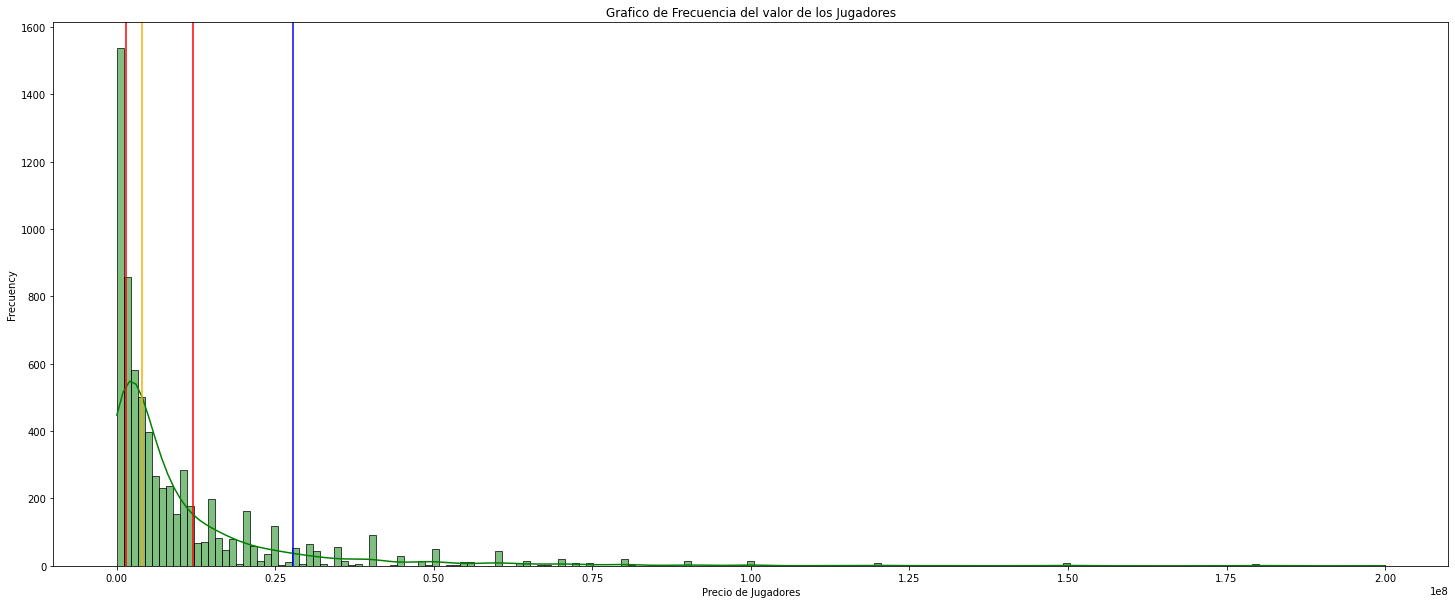

In [ ]:
plt.subplots(figsize = (25, 10))
sns.histplot(data=df, x="value", kde=True,color='green')
plt.ylabel('Frecuency')
plt.xlabel('Precio de Jugadores')
plt.title('Grafico de Frecuencia del valor de los Jugadores')

plt.axvline(Q3,color='red')
plt.axvline(Q1,color='red')

plt.axvline(df['value'].median(),color='#FFAB00')

plt.axvline(limiSu,color='blue')
plt.show()

Filtrado de los valores atipicos

In [ ]:
#Jugadores con Precio regular
df_norma=df[df['value']<limiSu]
df_norma

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30.0,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37.0,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26.0,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19.0,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22.0,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18.0,186.0,Niger,Forward,1000000,12,287,0,0,...,16,34,6,15,13,36,48,33,No,No
6820,Renato Steffen,25.0,170.0,Switzerland,Forward,3500000,16,659,0,0,...,16,34,6,15,13,36,48,33,No,No
6821,Paul Jaeckel,19.0,189.0,Germany,Defender,5000,3,270,0,0,...,16,34,6,15,13,36,48,33,No,No
6822,Paul Verhaegh,33.0,178.0,Netherlands,Defender,1000000,31,2614,2,2,...,16,34,6,15,13,36,48,33,No,No


In [ ]:
#Jugadores con Precio fuera del rango
df_outVal=df[(df['value']>limiSu)]
df_outVal

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
22,Youri Tielemans,22.0,176.0,Belgium,Midfield,44000000,37,2828,3,6,...,5,38,18,8,12,67,41,62,No,No
61,Wojciech Szczęsny,29.0,196.0,Poland,Goalkeeper,35000000,29,2591,0,0,...,1,38,26,5,7,76,43,83,Yes,No
63,Wissam Ben Yedder,28.0,170.0,France,Forward,40000000,26,2164,18,4,...,9,28,11,7,10,44,44,40,No,No
77,Wilfred Ndidi,22.0,183.0,Niger,Midfield,36000000,32,2674,2,1,...,5,38,18,8,12,67,41,62,No,No
99,Virgil van Dijk,28.0,193.0,Netherlands,Defender,80000000,38,3420,5,1,...,1,38,32,3,3,85,33,99,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,Danny Rose,27.0,173.0,United Kingdom,Defender,30000000,10,800,0,1,...,3,38,23,8,7,74,36,77,Yes,No
6593,Victor Wanyama,26.0,184.0,Kenya,Midfield,30000000,18,846,1,0,...,3,38,23,8,7,74,36,77,Yes,No
6658,João Cancelo,23.0,182.0,Portugal,Midfield,35000000,1,90,0,0,...,4,38,22,7,9,65,38,73,Yes,No
6662,Gonçalo Guedes,20.0,179.0,Portugal,Midfield,40000000,33,2435,5,7,...,4,38,22,7,9,65,38,73,Yes,No


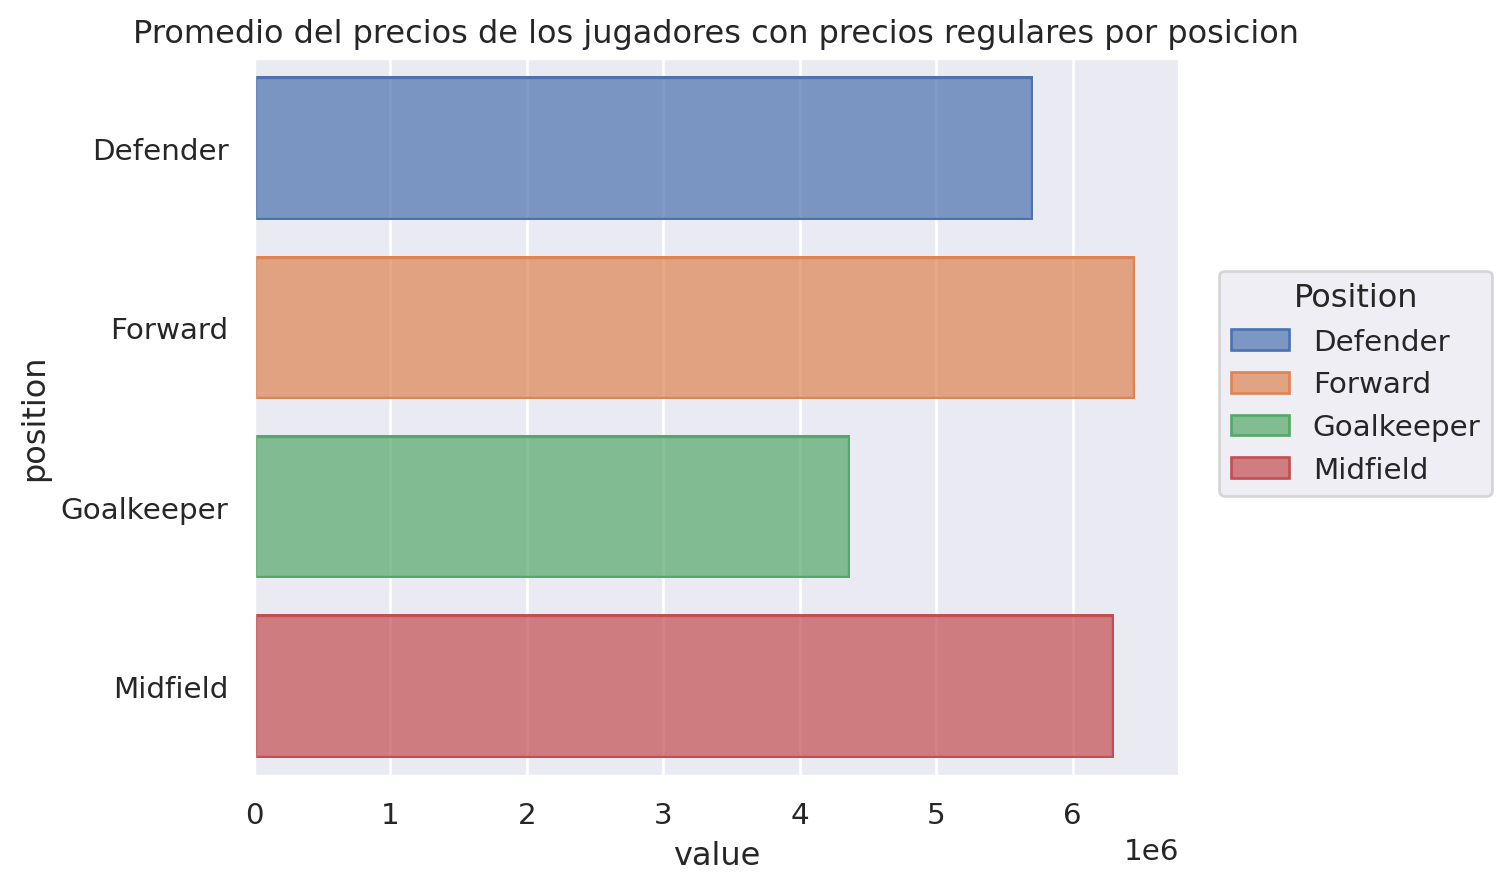

In [ ]:
so.Plot( df_norma.groupby('position')['value'].mean(),df_norma.groupby('position')['value'].mean().index,color=df_norma.groupby('position').mean().index
).add(so.Bar(),orient='y').label(color=str.capitalize,title='Promedio del precios de los jugadores con precios regulares por posicion')

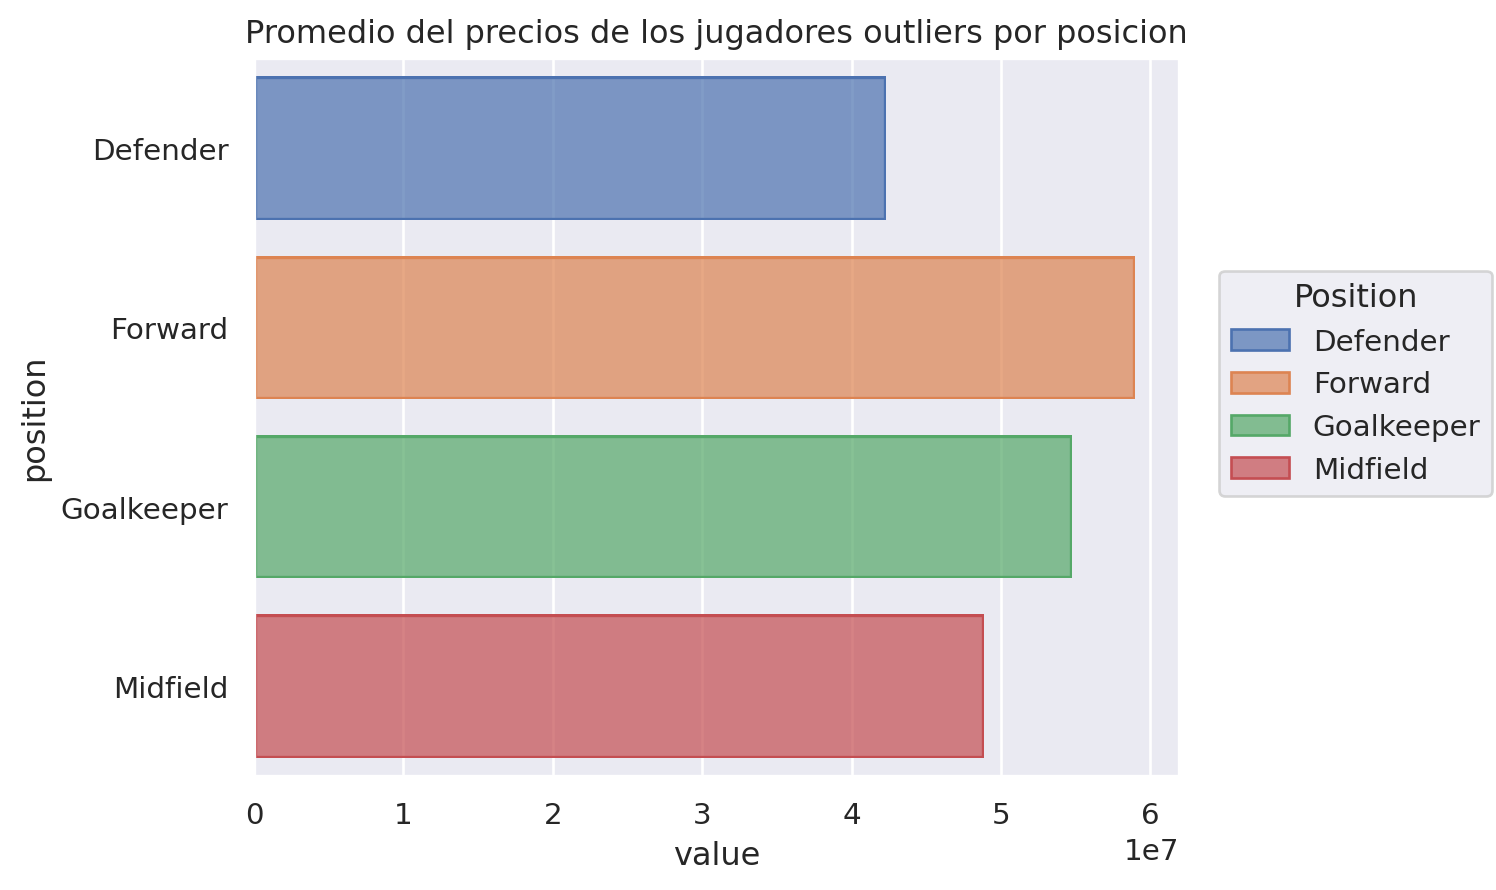

In [ ]:
so.Plot( df_outVal.groupby('position')['value'].mean(),df_outVal.groupby('position')['value'].mean().index,color=df_outVal.groupby('position').mean().index
).add(so.Bar(),orient='y').label(color=str.capitalize,title='Promedio del precios de los jugadores outliers por posicion')

Text(0.5, 1.0, 'Mapa de Correlacion de los jugadores outliers')

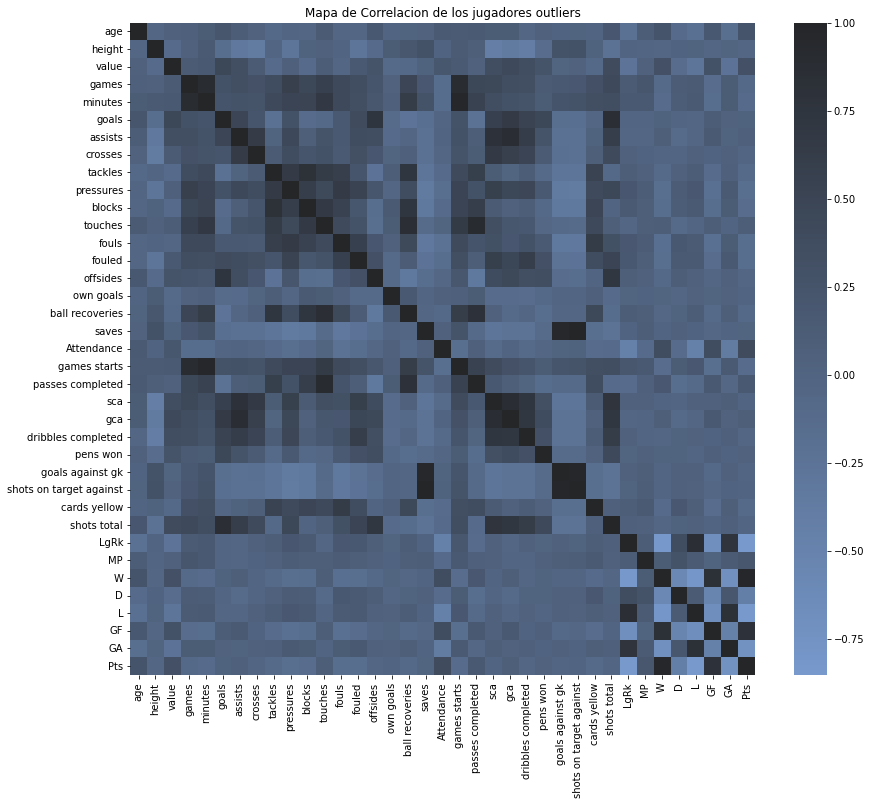

In [ ]:
plt.subplots(figsize = (14, 12))
sns.heatmap(df_outVal.corr(), cmap=sns.dark_palette("#79C",reverse=True,as_cmap=True))
plt.title('Mapa de Correlacion de los jugadores outliers')

Text(0.5, 1.0, 'Mapa de Correlacion de los jugadores Regulares')

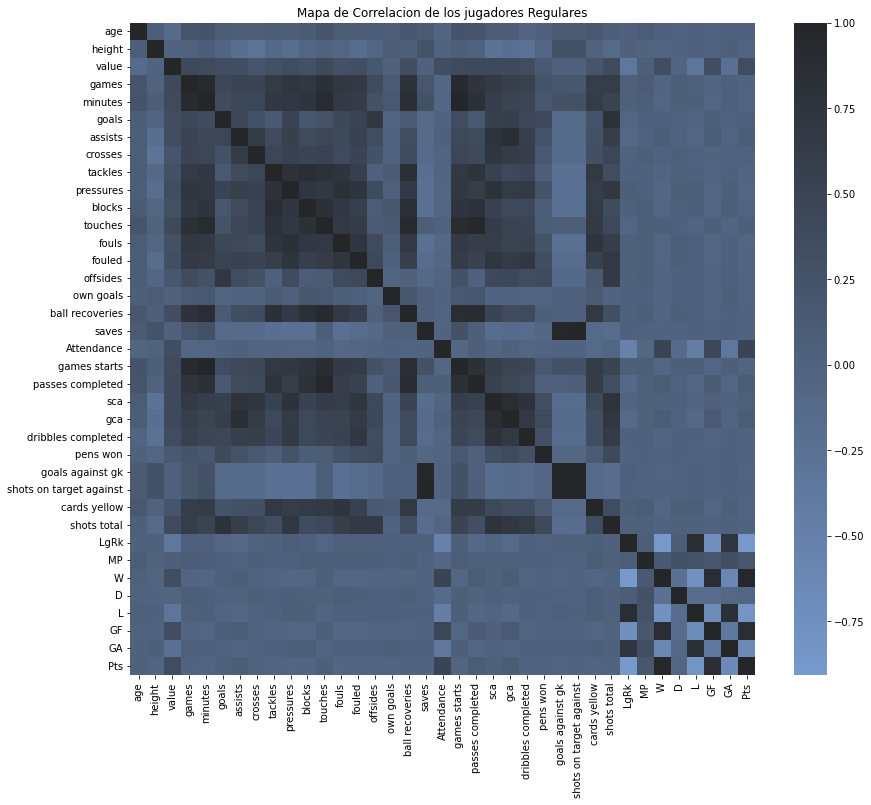

In [ ]:
plt.subplots(figsize = (14, 12))
sns.heatmap(df_norma.corr(), cmap=sns.dark_palette("#79C",reverse=True,as_cmap=True))
plt.title('Mapa de Correlacion de los jugadores Regulares')

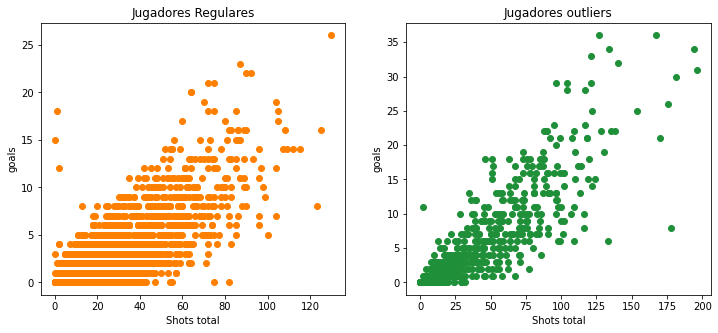

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (12, 5))

axs[0].scatter(df_norma['shots total'], df_norma['goals'],c="#FF8000")
axs[1].scatter(df_outVal['shots total'], df_outVal['goals'],c='#1F9039')

axs[0].set_xlabel('Shots total')
axs[0].set_ylabel('goals')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('Shots total')
axs[1].set_ylabel('goals')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
df_norma['goals'].value_counts()

0     3342
1     1124
2      576
3      364
4      203
5      152
6       97
7       78
8       61
9       49
10      30
11      25
12      16
13      15
14      12
16       8
15       8
18       5
17       3
21       2
22       2
20       2
19       2
23       1
26       1
Name: goals, dtype: int64

In [ ]:
df_outVal['goals'].value_counts()

0     118
1      90
2      66
3      59
4      54
7      27
6      27
5      26
10     19
8      19
9      18
13     15
12     14
11     12
18     11
16     11
17     10
15      8
22      7
14      6
21      6
19      4
29      3
25      2
36      2
34      2
23      2
28      2
31      1
20      1
33      1
32      1
26      1
30      1
Name: goals, dtype: int64

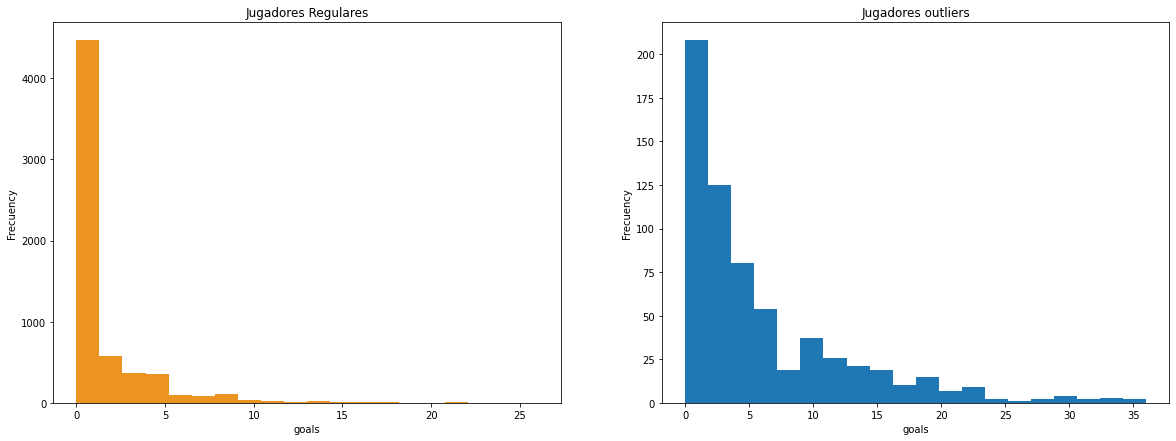

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (20, 7))

axs[0].hist(df_norma['goals'],bins=20,color='#EB9422')
axs[1].hist(df_outVal['goals'],bins=20)

axs[0].set_xlabel('goals')
axs[0].set_ylabel('Frecuency')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('goals')
axs[1].set_ylabel('Frecuency')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

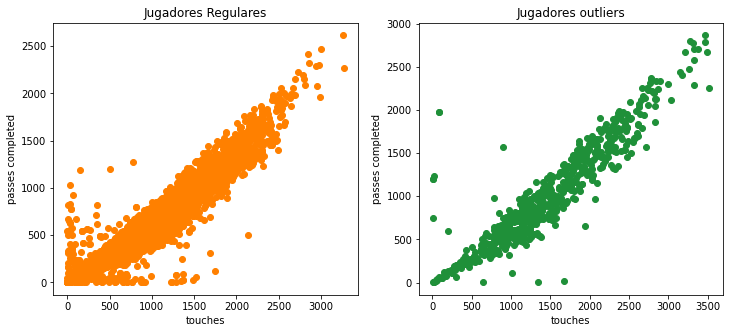

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (12, 5))

axs[0].scatter(df_norma['touches'], df_norma['passes completed'],c="#FF8000")
axs[1].scatter(df_outVal['touches'], df_outVal['passes completed'],c='#1F9039')

axs[0].set_xlabel('touches')
axs[0].set_ylabel('passes completed')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('touches')
axs[1].set_ylabel('passes completed')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

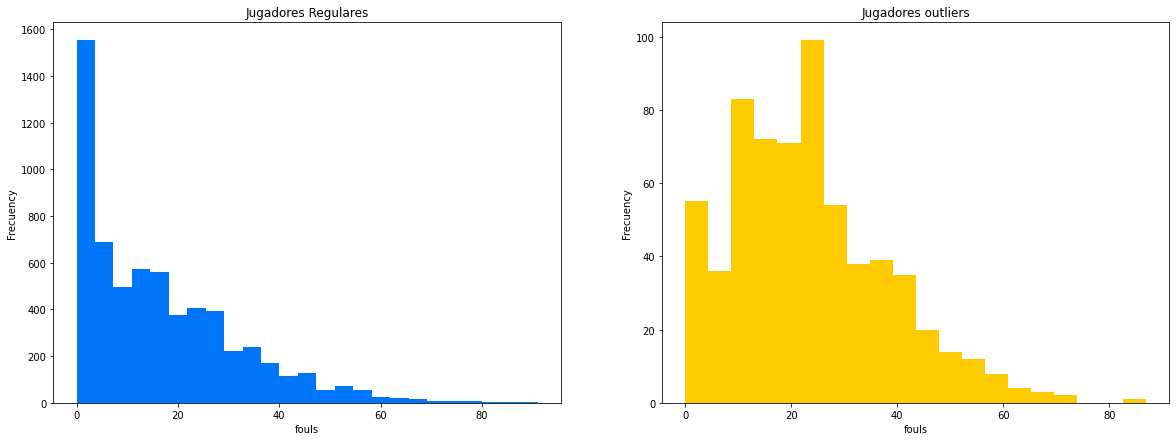

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (20, 7))

axs[0].hist(df_norma['fouls'],bins=25,color='#0076FD')
axs[1].hist(df_outVal['fouls'],bins=20,color='#FDCB00')

axs[0].set_xlabel('fouls')
axs[0].set_ylabel('Frecuency')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('fouls')
axs[1].set_ylabel('Frecuency')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

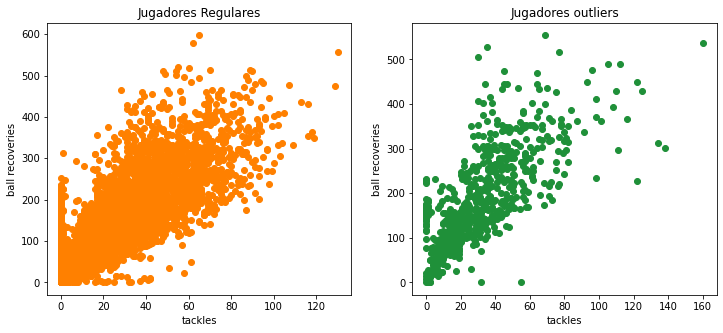

In [ ]:
#tackles= barridas esto puede ser en el caso de un defensa
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (12, 5))

axs[0].scatter(df_norma['tackles'], df_norma['ball recoveries'],c="#FF8000")
axs[1].scatter(df_outVal['tackles'], df_outVal['ball recoveries'],c='#1F9039')

axs[0].set_xlabel('tackles')
axs[0].set_ylabel('ball recoveries')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('tackles')
axs[1].set_ylabel('ball recoveries')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

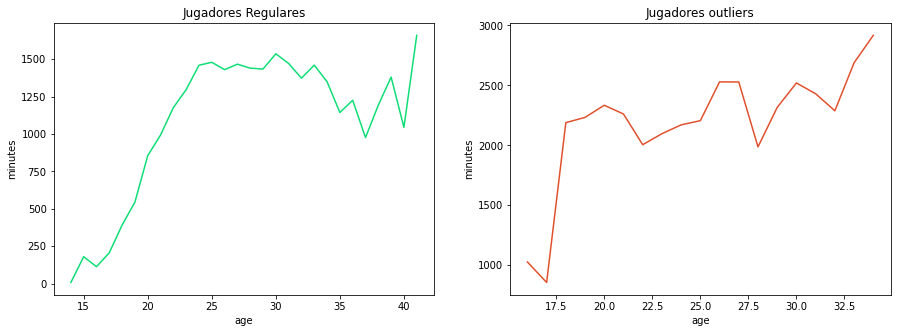

In [ ]:
#tackles= barridas esto puede ser en el caso de un defensa
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 5))

axs[0].plot(df_norma.groupby('age')['minutes'].mean().index,df_norma.groupby('age')['minutes'].mean(),color='#0EDE76')
axs[1].plot(df_outVal.groupby('age')['minutes'].median().index,df_outVal.groupby('age')['minutes'].median(),color='#E1502C')

axs[0].set_xlabel('age')
axs[0].set_ylabel('minutes')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('age')
axs[1].set_ylabel('minutes')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

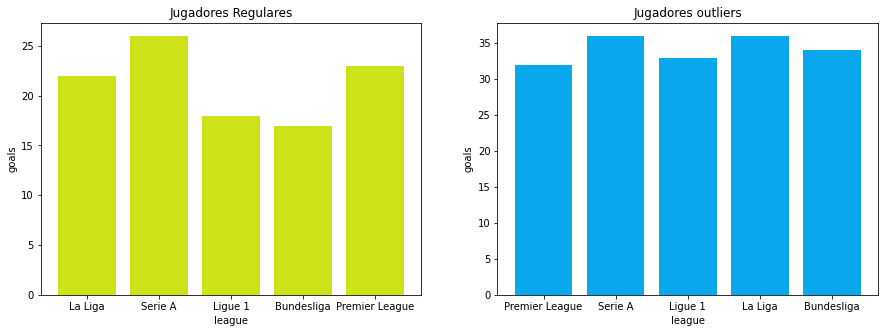

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 5))

axs[0].bar(df_norma['league'],df_norma['goals'],color='#CEE21A')
axs[1].bar(df_outVal['league'],df_outVal['goals'],color='#09A8EC')

axs[0].set_xlabel('league')
axs[0].set_ylabel('goals')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('league')
axs[1].set_ylabel('goals')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

Un analisis breve de GoolKeeper

In [ ]:
df_Arquero_regu=df_norma[df_norma['position']=='Goalkeeper']
df_Arquero_regu

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
6,Zack Steffen,24.0,191.0,United States,Goalkeeper,6000000,17,1530,0,0,...,17,34,6,12,16,36,67,30,No,No
7,Yvon Mvogo,25.0,186.0,Switzerland,Goalkeeper,2000000,2,180,0,0,...,3,34,18,12,4,81,37,66,Yes,No
25,Yohann Pelé,36.0,196.0,France,Goalkeeper,25000,2,150,0,0,...,2,28,16,8,4,41,29,56,Yes,No
32,Yassine Bounou,28.0,192.0,Morocco,Goalkeeper,15000000,6,495,0,1,...,4,38,19,13,6,54,34,70,Yes,No
37,Yannis Clementia,22.0,188.0,France,Goalkeeper,95000,2,180,0,0,...,5,28,11,8,9,41,38,41,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,Ben Foster,34.0,193.0,United Kingdom,Goalkeeper,3000000,37,3330,0,0,...,20,38,6,13,19,31,56,31,No,No
6771,Boaz Myhill,34.0,191.0,United Kingdom,Goalkeeper,1000000,1,90,0,0,...,20,38,6,13,19,31,56,31,No,No
6777,Adrian Del Castillo,30.0,190.0,Spain,Goalkeeper,5000000,19,1710,0,0,...,13,38,10,12,16,48,68,42,No,No
6788,Joe Hart,30.0,196.0,United Kingdom,Goalkeeper,10000000,19,1710,0,1,...,13,38,10,12,16,48,68,42,No,No


In [ ]:
df_Arquero_out=df_outVal[df_outVal['position']=='Goalkeeper']
df_Arquero_out

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
61,Wojciech Szczęsny,29.0,196.0,Poland,Goalkeeper,35000000,29,2591,0,0,...,1,38,26,5,7,76,43,83,Yes,No
206,Thibaut Courtois,27.0,199.0,Belgium,Goalkeeper,48000000,34,3060,0,0,...,1,38,26,9,3,70,25,87,Yes,No
1014,Marc-André ter Stegen,27.0,187.0,Germany,Goalkeeper,72000000,36,3240,0,2,...,2,38,25,7,6,86,38,82,Yes,No
1258,Kepa Arrizabalaga,24.0,186.0,Spain,Goalkeeper,36000000,33,2970,0,0,...,4,38,20,6,12,69,54,66,Yes,No
1372,Jordan Pickford,25.0,185.0,United Kingdom,Goalkeeper,28000000,38,3420,0,0,...,12,38,13,10,15,44,56,49,No,No
1503,Jan Oblak,26.0,188.0,Slovenia,Goalkeeper,90000000,38,3395,0,0,...,3,38,18,16,4,51,27,70,Yes,No
1680,Gianluigi Donnarumma,20.0,196.0,Italy,Goalkeeper,49000000,36,3201,0,0,...,6,38,19,9,10,63,46,66,No,No
1914,Ederson,25.0,188.0,Brazil,Goalkeeper,56000000,35,3071,0,0,...,2,38,26,3,9,102,35,81,Yes,No
2021,David de Gea,28.0,192.0,Spain,Goalkeeper,40000000,38,3420,0,0,...,3,38,18,12,8,66,36,66,Yes,No
2232,Bernd Leno,27.0,190.0,Germany,Goalkeeper,28000000,30,2649,0,0,...,8,38,14,14,10,56,48,56,No,No


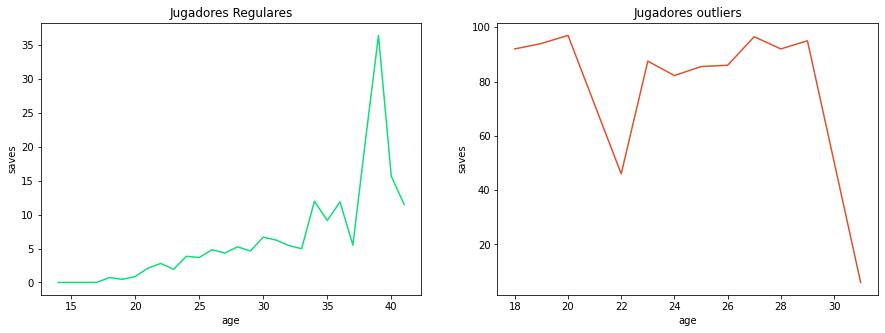

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 5))

axs[0].plot(df_norma.groupby('age')['saves'].mean().index,df_norma.groupby('age')['saves'].mean(),color='#0EDE76')
axs[1].plot(df_Arquero_out.groupby('age')['saves'].mean().index,df_Arquero_out.groupby('age')['saves'].mean(),color='#E1502C')

axs[0].set_xlabel('age')
axs[0].set_ylabel('saves')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('age')
axs[1].set_ylabel('saves')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, 'Cantidad de Arqueros por Pais')

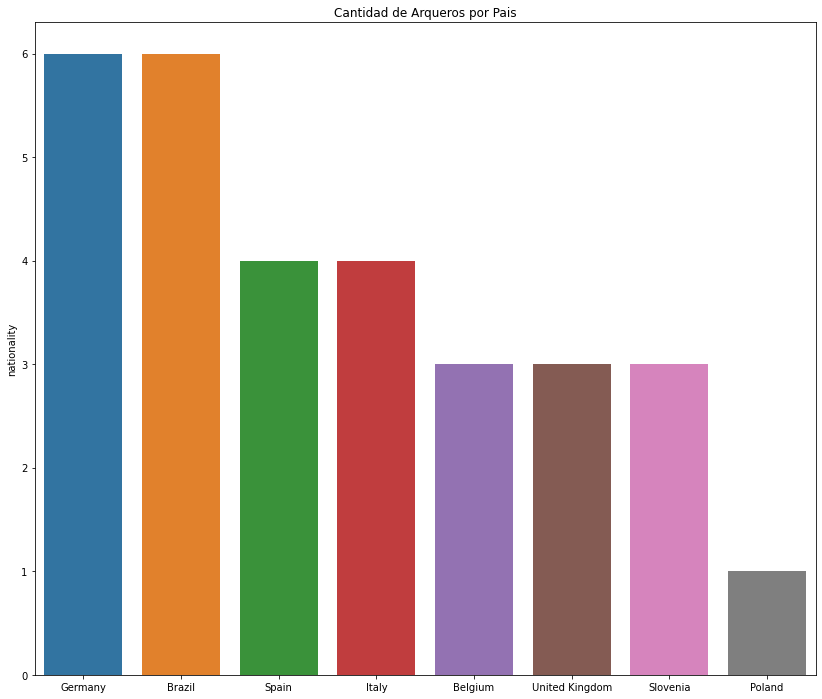

In [ ]:
plt.subplots(figsize = (14, 12))
sns.barplot(data=df_Arquero_out, x=df_Arquero_out.nationality.value_counts().index, y=df_Arquero_out.nationality.value_counts())
plt.title('Cantidad de Arqueros por Pais')